<a href="https://colab.research.google.com/github/LeonSilva15/fcc-machine-learning/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

## Get project data

In [ ]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip cats_and_dogs.zip

# See data structure

In [ ]:
!apt-get install tree

In [ ]:
!tree cats_and_dogs

## Create the paths

In [7]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

## Get data size

In [8]:
# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print( 'total_train:', total_train )
print( 'total_val:', total_val )
print( 'total_test:', total_test )

total_train: 2001
total_val: 1001
total_test: 51


## Pre-processing variables

In [9]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Imaga generators

In [10]:
train_image_generator = ImageDataGenerator(
      rescale=1. / 255,
      zoom_range = 0.2,
      horizontal_flip = True,
      width_shift_range = 0.2,
      height_shift_range = 0.2
)
validation_image_generator = ImageDataGenerator(
      rescale=1. / 255
)
test_image_generator = ImageDataGenerator(
      rescale=1. / 255
)

train_data_gen = train_image_generator.flow_from_directory(
      train_dir,
      color_mode='rgb',
      batch_size=32,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      shuffle=True,
      class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
      validation_dir,
      color_mode='rgb',
      batch_size=32,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      shuffle=True,
      class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
      PATH,
      color_mode='rgb',
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      classes=['test'],
      shuffle=False,
      class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## Image plotter

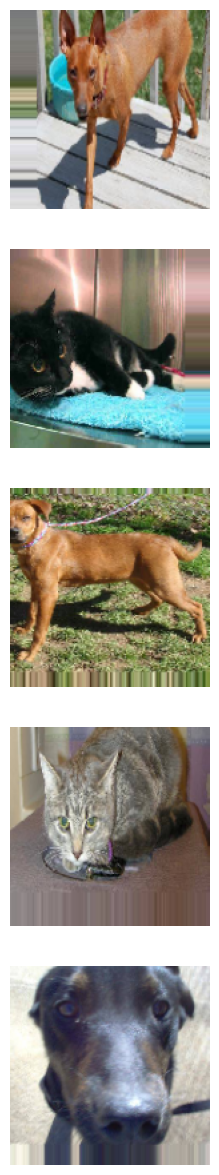

In [11]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Create the Model

In [12]:
model = Sequential()

model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3) ))
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu' ))
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu' ))

model.add( Flatten() )
model.add( Dense(64, activation='relu' ))
model.add( Dense(1, activation='sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

## Compile the model

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [14]:
step_size_train = train_data_gen.n // train_data_gen.batch_size

history = model.fit(
    train_data_gen,
    steps_per_epoch = step_size_train,
    batch_size = train_data_gen.batch_size,
    validation_data = val_data_gen,
    epochs = 50
)

Epoch 1/50
62/62 [==============================] - 13s 210ms/step - loss: 0.7675 - accuracy: 0.5066 - val_loss: 0.6929 - val_accuracy: 0.4970
Epoch 2/50
62/62 [==============================] - 12s 195ms/step - loss: 0.6917 - accuracy: 0.5041 - val_loss: 0.6889 - val_accuracy: 0.5520
Epoch 3/50
62/62 [==============================] - 13s 210ms/step - loss: 0.6728 - accuracy: 0.5696 - val_loss: 0.6483 - val_accuracy: 0.6130
Epoch 4/50
62/62 [==============================] - 13s 201ms/step - loss: 0.6696 - accuracy: 0.5864 - val_loss: 0.6779 - val_accuracy: 0.5560
Epoch 5/50
62/62 [==============================] - 12s 200ms/step - loss: 0.6589 - accuracy: 0.5874 - val_loss: 0.6291 - val_accuracy: 0.6350
Epoch 6/50
62/62 [==============================] - 13s 208ms/step - loss: 0.6549 - accuracy: 0.6230 - val_loss: 0.7736 - val_accuracy: 0.5720
Epoch 7/50
62/62 [==============================] - 13s 208ms/step - loss: 0.6484 - accuracy: 0.6108 - val_loss: 0.6055 - val_accuracy: 0.6640

## Evaluate the model

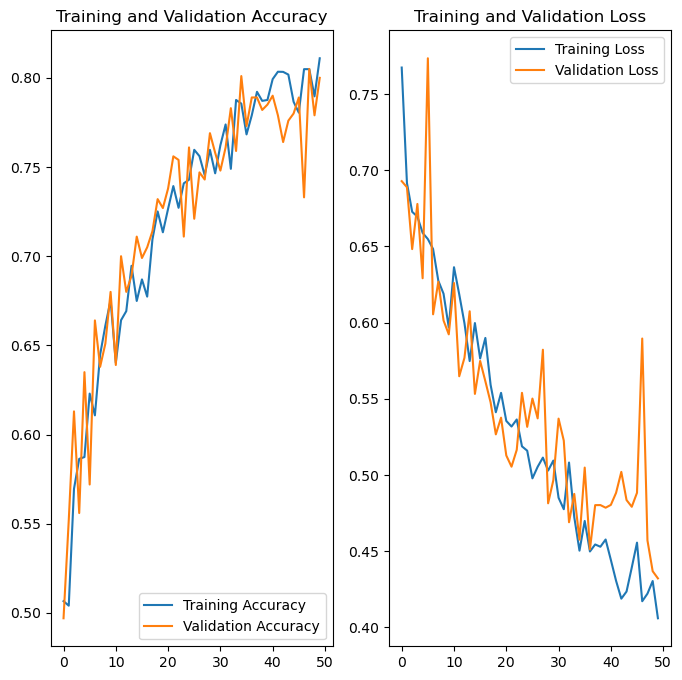

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Manual testing

In [25]:
probabilities = model.predict( test_data_gen )
print( probabilities[:5] )

2/2 [==============================] - 0s 26ms/step
[[0.89321953]
 [0.07359347]
 [0.01447541]
 [0.9992739 ]
 [0.03310901]]


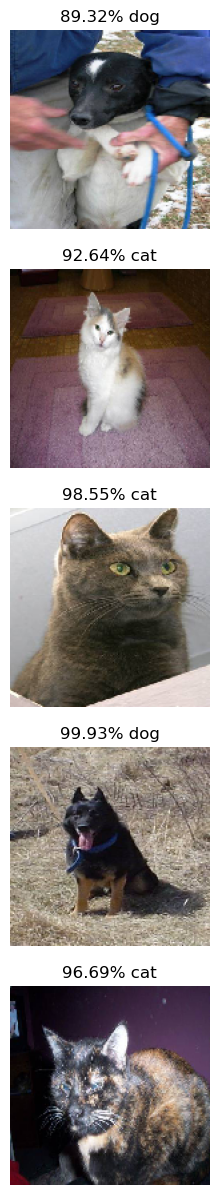

In [27]:
test_training_images, _ = next( test_data_gen )
plotImages( test_training_images[:5], probabilities )

In [28]:
model_loss, model_acc = model.evaluate( val_data_gen )
print( 'Accuracy: {}, Loss: {}'.format( model_acc, model_loss ) )

32/32 [==============================] - 2s 63ms/step - loss: 0.4321 - accuracy: 0.8000
Accuracy: 0.800000011920929, Loss: 0.43208763003349304
